<a href="https://colab.research.google.com/github/kyshc176/Proyek-Predictive-Analytics/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [ ]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#  Data Preparation & Removing Outlier

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Fitur Point unnamed tidak mempengaruhi harga sewa model sehingga akan didrop
df = df.drop(["Unnamed: 0"], axis = 'columns')

# Univariate Analysis

In [ ]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
print("Unique values in 'cut':", df['cut'].unique())
print("Unique values in 'color':", df['color'].unique())
print("Unique values in 'clarity':", df['clarity'].unique())


Unique values in 'cut': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in 'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in 'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


/var/folders/0p/6vxwskbx575_7310k8vfjpsm0000gn/T/ipykernel_35773/4108962952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cut', data=df, palette='Set2')


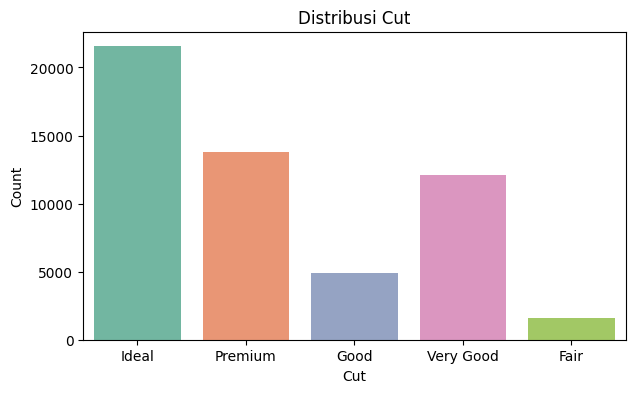

/var/folders/0p/6vxwskbx575_7310k8vfjpsm0000gn/T/ipykernel_35773/4108962952.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=df, palette='Set3')


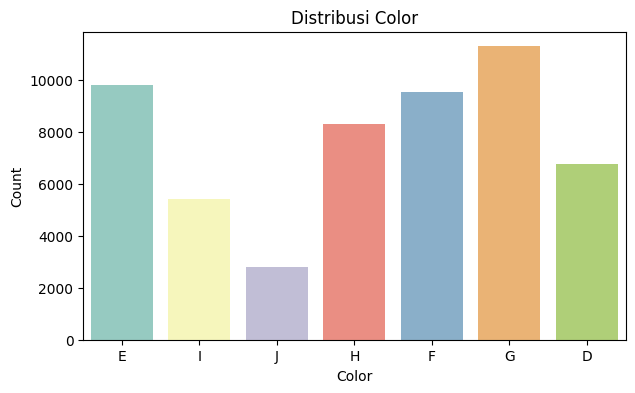

/var/folders/0p/6vxwskbx575_7310k8vfjpsm0000gn/T/ipykernel_35773/4108962952.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clarity', data=df, palette='pastel')


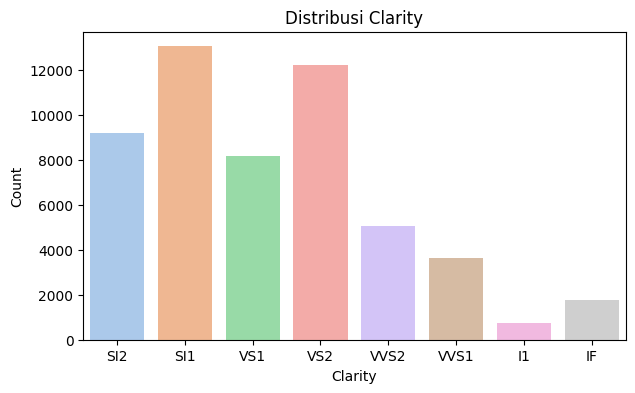

In [ ]:
# Distribusi kategori cut
plt.figure(figsize=(7, 4))
sns.countplot(x='cut', data=df, palette='Set2')
plt.title('Distribusi Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

# Distribusi kategori color
plt.figure(figsize=(7, 4))
sns.countplot(x='color', data=df, palette='Set3')
plt.title('Distribusi Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# Distribusi kategori clarity
plt.figure(figsize=(7, 4))
sns.countplot(x='clarity', data=df, palette='pastel')
plt.title('Distribusi Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()

In [ ]:
# Make copy to avoid changing original data
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Nilai minimum “x”, “y”, “z” adalah nol, hal ini mengindikasikan bahwa ada nilai yang salah dalam data yang mewakili berlian tanpa dimensi atau 2 dimensi. Jadi, kita perlu menyaringnya karena itu adalah titik data yang rusak.

In [ ]:
#Dropping dimentionless diamonds
data = df.drop(df[df["x"]==0].index)
data = df.drop(df[df["y"]==0].index)
data = df.drop(df[df["z"]==0].index)
df.shape

(53940, 10)

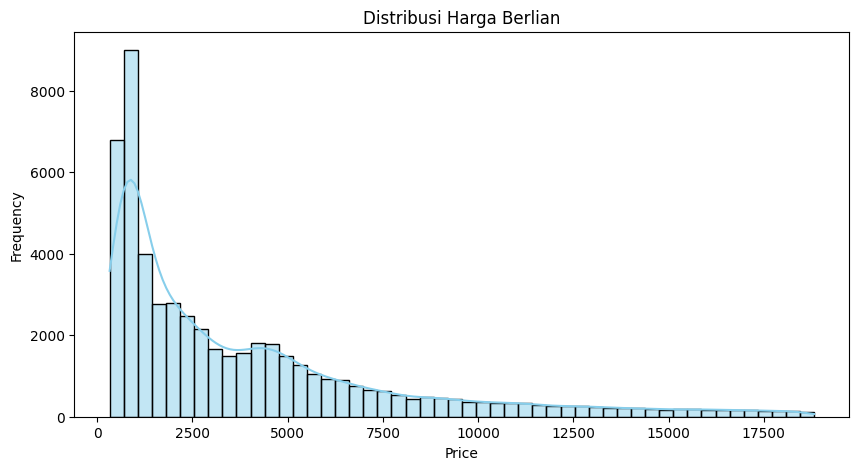

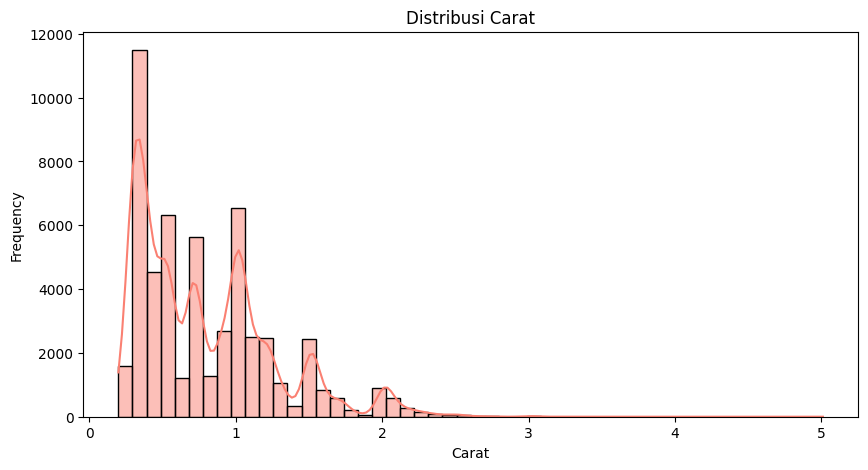

In [ ]:
# Menampilkan distribusi harga
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Berlian')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Menampilkan distribusi carat
plt.figure(figsize=(10, 5))
sns.histplot(df['carat'], bins=50, kde=True, color='salmon')
plt.title('Distribusi Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

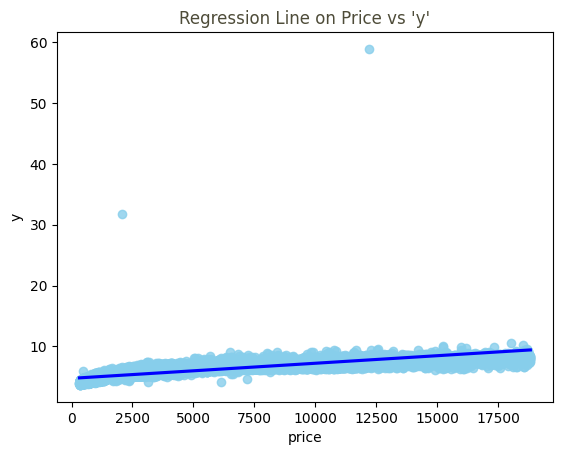

In [ ]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, scatter_kws={"color": "skyblue"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

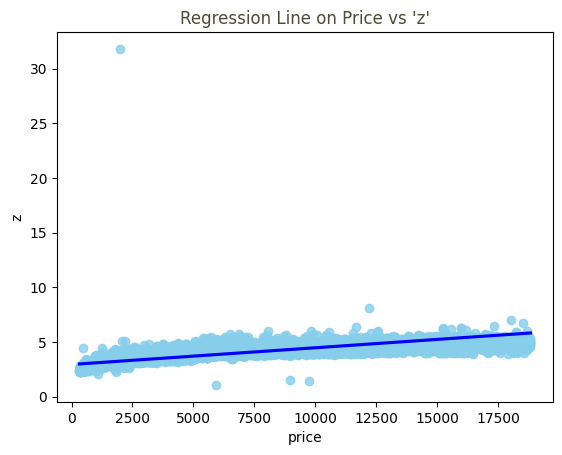

In [ ]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True, scatter_kws={"color": "skyblue"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

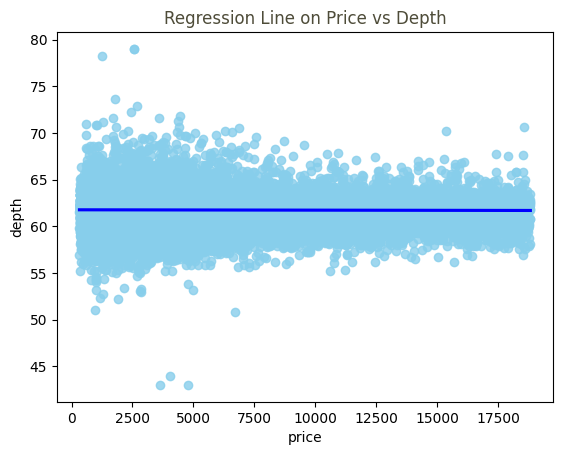

In [ ]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, scatter_kws={"color": "skyblue"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

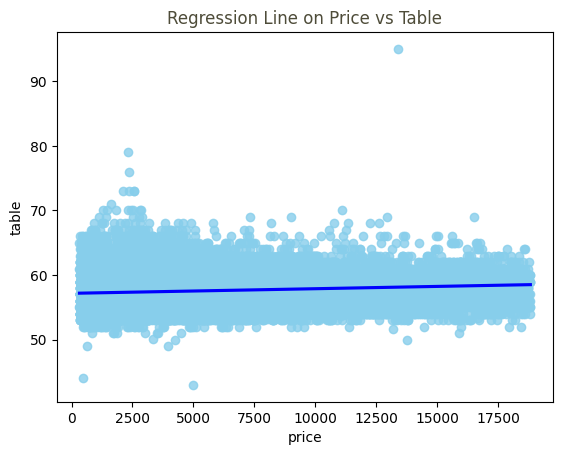

In [ ]:
ax=sns.regplot(x="price", y="table", data=data, fit_reg=True, scatter_kws={"color": "skyblue"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

Kita dapat dengan jelas melihat pencilan pada atribut-atribut ini. Selanjutnya, kita akan menghapus titik-titik data ini.

In [ ]:
#Dropping the outliers.
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

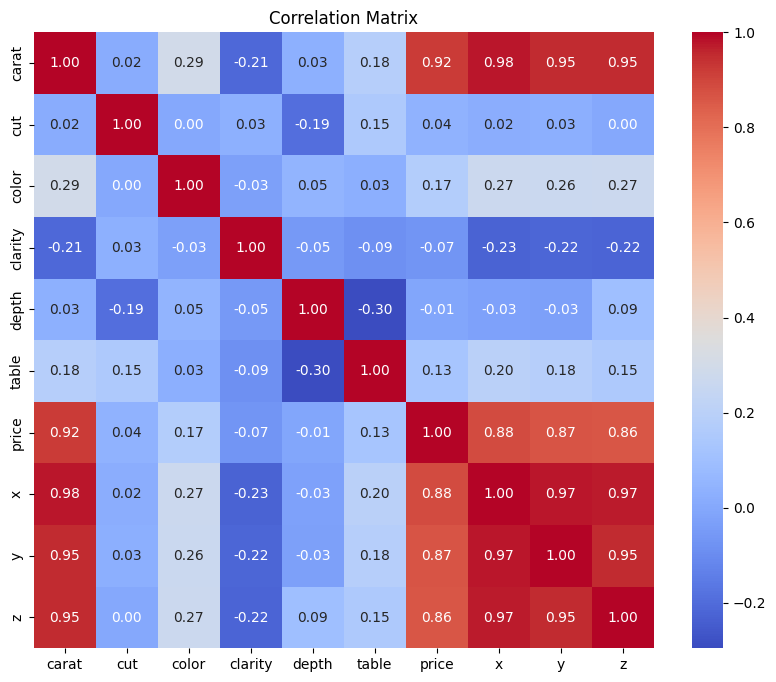

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(label_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Modelling & Evaluation

# Train-Test Split

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")
print(f"Ukuran label latih (y_train): {y_train.shape}")
print(f"Ukuran label uji (y_test): {y_test.shape}")


Ukuran data latih (X_train): (43152, 23)
Ukuran data uji (X_test): (10788, 23)
Ukuran label latih (y_train): (43152,)
Ukuran label uji (y_test): (10788,)


In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "KNeighbors": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

pd.DataFrame(results).T


,MAE,MSE,RMSE,R2 Score
LinearRegression,737.151367,1.288705e+06,1135.211645,0.918933
DecisionTree,383.259084,7.163422e+05,846.370009,0.954938
RandomForest,296.683038,4.089958e+05,639.527772,0.974272
KNeighbors,416.428291,6.838976e+05,826.981032,0.956979


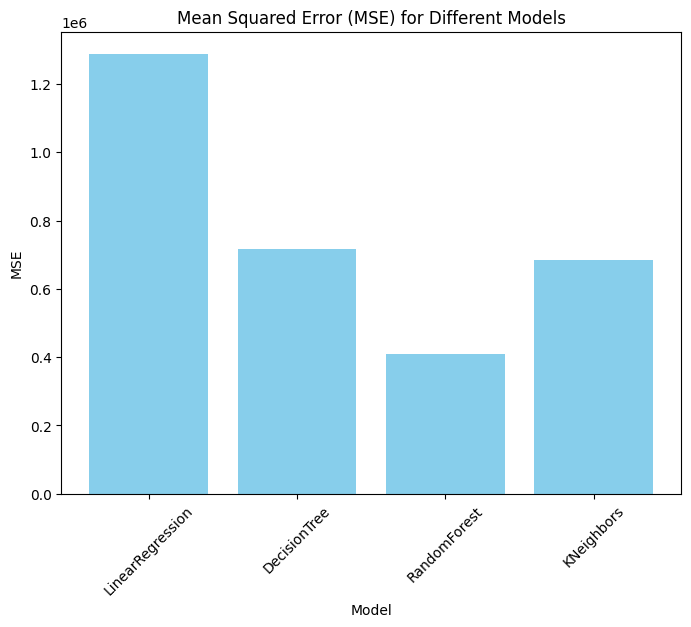

In [ ]:
# Extract MSE values from results
mse_values = {name: metrics["MSE"] for name, metrics in results.items()}

# Create a bar plot for MSE values
plt.figure(figsize=(8, 6))
plt.bar(mse_values.keys(), mse_values.values(), color='skyblue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()